In [85]:
import pandas as pd
import pandas as pd
import cv2
from skimage.transform import resize
import numpy as np
import os
from scipy import ndimage, misc
from skimage import color
from skimage import io
from os import listdir
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from socket import socket
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [ ]:
all_image=[]
count=0
for index in range(df.shape[0]):
    id=df.loc[index,'Id']
    path='/content/drive/MyDrive/train/'+str(id)+'.jpg'
    im_array=cv2.imread(path)
    im_array=resize(im_array,(256,256),anti_aliasing=True)
    all_image.append(im_array)
    
    count+=1
    progress=(count/len(df['Id']))*100
    print('progress =',round(progress,2), '%',end='\r')

In [ ]:
import pickle

with open ('/content/images', 'rb') as fp:
    all_image = pickle.load(fp)

In [ ]:
all_image = all_image[:len(all_image)-6]

In [ ]:
all_image[1]

array([[[0.58615196, 0.55870098, 0.57046569],
        [0.56078431, 0.53333333, 0.54509804],
        [0.54509804, 0.51764706, 0.52941176],
        ...,
        [0.62352941, 0.68440564, 0.74580365],
        [0.64004959, 0.70279469, 0.76835172],
        [0.62278167, 0.68552677, 0.76678922]],

       [[0.58823529, 0.56078431, 0.57254902],
        [0.57022059, 0.54276961, 0.55586225],
        [0.55686275, 0.52941176, 0.54194527],
        ...,
        [0.60952819, 0.68872836, 0.74901961],
        [0.62749215, 0.70523897, 0.76798407],
        [0.62098652, 0.69604779, 0.77447917]],

       [[0.57797181, 0.55294118, 0.57104779],
        [0.56923732, 0.54509804, 0.56176758],
        [0.55919596, 0.53174498, 0.54509804],
        ...,
        [0.58581495, 0.67601103, 0.74117647],
        [0.58581495, 0.67833946, 0.74206782],
        [0.57104779, 0.66596297, 0.73333333]],

       ...,

       [[0.11973039, 0.18397672, 0.33020929],
        [0.12941176, 0.19607843, 0.34117647],
        [0.10330882, 0

In [ ]:
grayscaled = []

for image in all_image:
  image = color.rgb2gray(image)
  grayscaled.append(image)


In [ ]:
len(grayscaled)

9912

In [ ]:
grayscaled[0][0]

array([0.63447441, 0.62953162, 0.63835072, 0.64172327, 0.65187526,
       0.67093919, 0.6752877 , 0.68869778, 0.69735168, 0.70307882,
       0.7064737 , 0.71767007, 0.71951289, 0.72811939, 0.73034823,
       0.72812226, 0.73311709, 0.73610713, 0.74320127, 0.74525616,
       0.74106382, 0.73743878, 0.74001907, 0.74176732, 0.75105257,
       0.74643335, 0.72661496, 0.73110333, 0.73650372, 0.74270496,
       0.73488719, 0.74610713, 0.74797636, 0.73991462, 0.73722609,
       0.73730702, 0.73063428, 0.74213836, 0.75259481, 0.73786109,
       0.73507949, 0.74102801, 0.74138643, 0.73677402, 0.72674835,
       0.72207261, 0.71648359, 0.70133923, 0.703146  , 0.70292732,
       0.70309636, 0.71182111, 0.7110463 , 0.7106173 , 0.71367926,
       0.70874041, 0.70182146, 0.70752938, 0.7156806 , 0.70067203,
       0.68542085, 0.67591067, 0.68793   , 0.68816928])

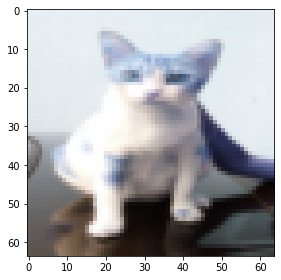

In [ ]:
io.imshow(all_image[800])

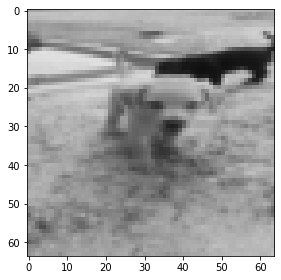

In [ ]:
io.imshow(grayscaled[0])

In [ ]:
type(grayscaled)

list

In [ ]:
blurred = []
for image in grayscaled:
    
      image = ndimage.gaussian_filter(image, sigma= 1)
      blurred.append(image)

In [ ]:
blurred[0][0][0]

0.671519855536712

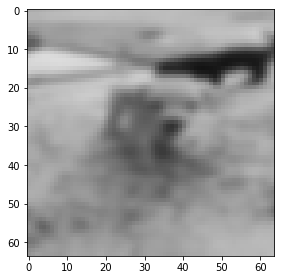

In [ ]:
io.imshow(blurred[0])

In [ ]:
type(all_image)

list

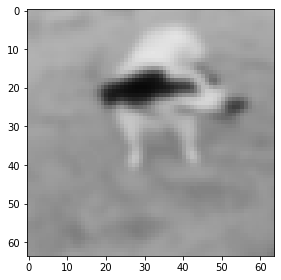

In [ ]:
io.imshow(image)

In [ ]:
flipped_horizontal = []
for image in blurred:
    
      image1 = cv2.flip(image,0)
      
      flipped_horizontal.append(image1)

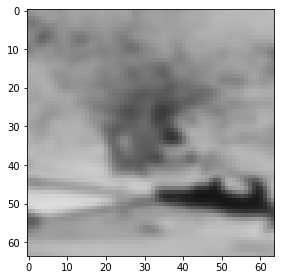

In [ ]:
io.imshow(flipped_horizontal[0])

In [ ]:
flipped_vertical = []
for image in blurred:
    
      image2 = cv2.flip(image,1)
      
      flipped_vertical.append(image2)


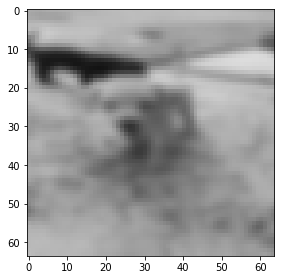

In [ ]:
io.imshow(flipped_vertical[0])

In [ ]:
y = df['Pawpularity']

In [ ]:
X_grayscaled = (np.array(grayscaled))

In [ ]:
def model_eval(model, X_train, y_train, X_test, y_test, name):
    
    # calculate training data metrics
    train_eval = model.evaluate(X_train, y_train)
    
    # calculate test data metrics
    test_eval = model.evaluate(X_test, y_test)
    
    # print metrics
    print(f"""
    {name} Training Metrics:
    Loss: {round(train_eval[0] , 3)}
    Root Mean Square Error: {round(train_eval[1] , 3)}
    Cross Validation Score: 
    ------
    {name} Test Metrics:
    Loss: {round(test_eval[0] , 3)}
    Root Mean Square Error: {round(test_eval[1] , 3)}
    """)
    # visualize predictions
    ypred = model.predict(X_test)
    x_ax = range(len(ypred))
    plt.figure(figsize=(20,10))
    plt.scatter(x_ax, y_test, s=15, color="blue", label="original")
    plt.plot(x_ax, ypred, lw=1, color="red", label="predicted")
    plt.legend()
    plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_grayscaled, y, random_state=42)

In [ ]:
ann_grayscaled = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='relu')
      ])

ann_grayscaled.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

ann_grayscaled.fit(X_train, y_train, epochs=5)

Epoch 1/5
233/233 [==============================] - 24s 100ms/step - loss: 652.8066 - root_mean_squared_error: 25.5501
Epoch 2/5
233/233 [==============================] - 26s 111ms/step - loss: 618.1302 - root_mean_squared_error: 24.8622
Epoch 3/5
233/233 [==============================] - 24s 104ms/step - loss: 613.4098 - root_mean_squared_error: 24.7671
Epoch 4/5
233/233 [==============================] - 23s 97ms/step - loss: 606.4743 - root_mean_squared_error: 24.6267
Epoch 5/5
233/233 [==============================] - 26s 110ms/step - loss: 605.5580 - root_mean_squared_error: 24.6081


78/78 [==============================] - 2s 30ms/step - loss: 709.0286 - root_mean_squared_error: 26.6276

    grayscale Training Metrics:
    Loss: 670.923
    Root Mean Square Error: 25.902
    Cross Validation Score: 
    ------
    grayscale Test Metrics:
    Loss: 709.029
    Root Mean Square Error: 26.628
    


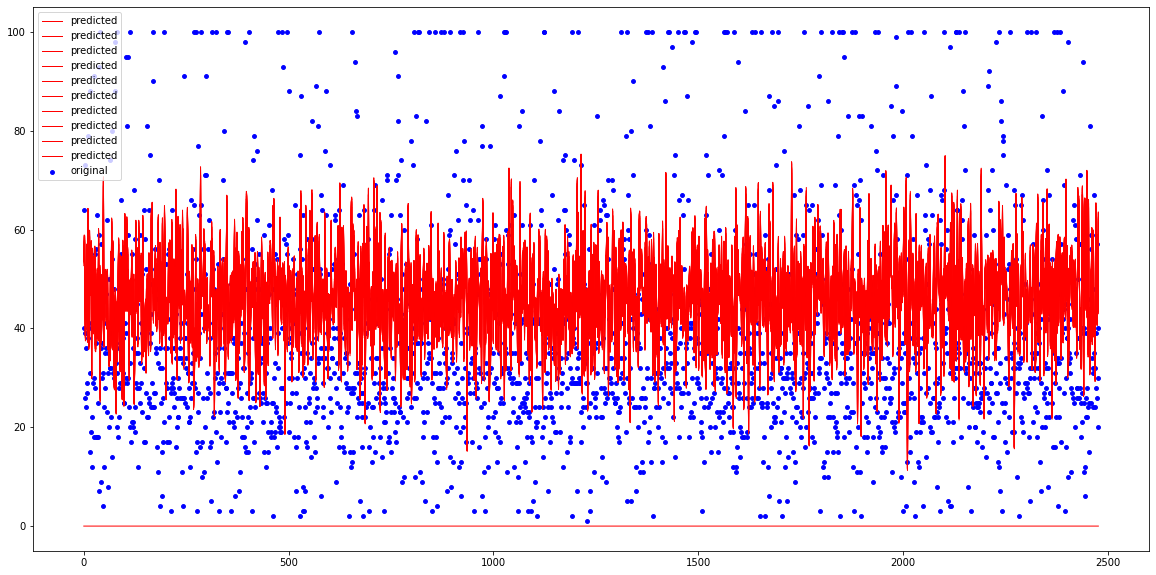

In [ ]:
model_eval(ann_grayscaled, X_train, y_train, X_test, y_test, 'grayscale')

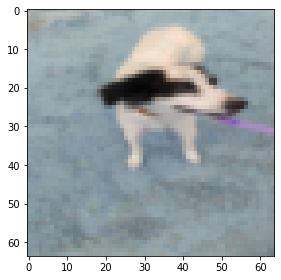

In [ ]:
io.imshow(all_image[-1])

In [ ]:
X_blurred = (np.array(blurred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_blurred, y, random_state=42)

In [ ]:
ann_blurred = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='relu')
      ])

ann_blurred.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

ann_blurred.fit(X_train, y_train, epochs=5)

Epoch 1/5
233/233 [==============================] - 25s 107ms/step - loss: 508.7140 - root_mean_squared_error: 22.5547
Epoch 2/5
233/233 [==============================] - 23s 99ms/step - loss: 484.1253 - root_mean_squared_error: 22.0028
Epoch 3/5
233/233 [==============================] - 23s 100ms/step - loss: 480.4392 - root_mean_squared_error: 21.9189
Epoch 4/5
233/233 [==============================] - 24s 103ms/step - loss: 467.2986 - root_mean_squared_error: 21.6171
Epoch 5/5
233/233 [==============================] - 23s 99ms/step - loss: 464.9831 - root_mean_squared_error: 21.5635


78/78 [==============================] - 2s 31ms/step - loss: 533.5909 - root_mean_squared_error: 23.0996

    gray scaled & blurred Training Metrics:
    Loss: 494.477
    Root Mean Square Error: 22.237
    Cross Validation Score: 
    ------
    gray scaled & blurred Test Metrics:
    Loss: 533.591
    Root Mean Square Error: 23.1
    


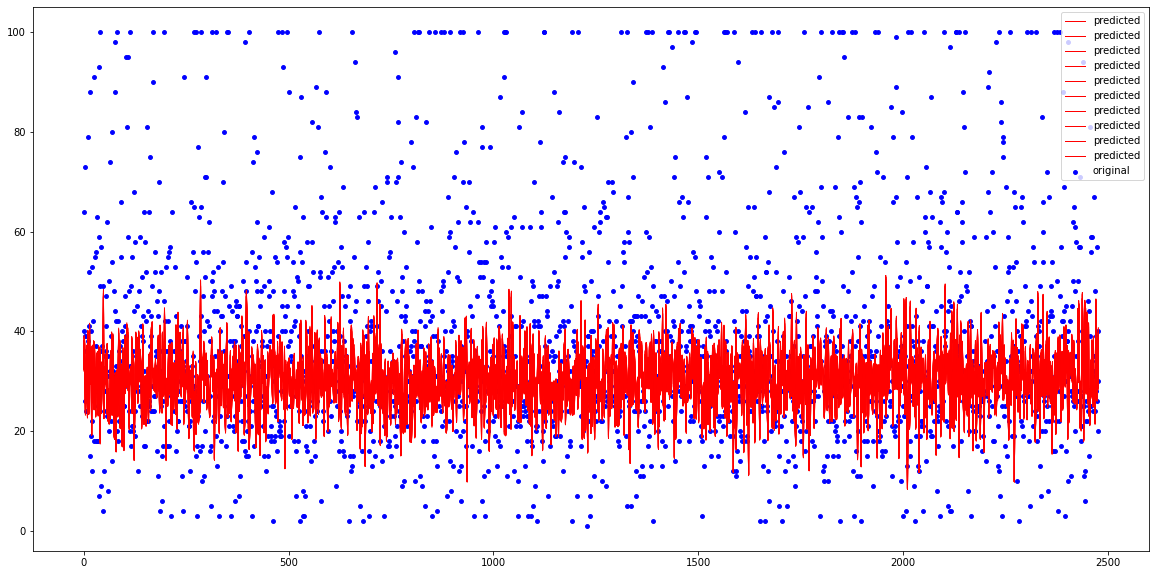

In [ ]:
model_eval(ann_blurred, X_train, y_train, X_test, y_test, 'gray scaled & blurred')

In [ ]:
X_flipped_horizontal = (np.array(flipped_horizontal))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_flipped_horizontal , y, random_state=42)

In [ ]:
ann_flipped_horizontal= tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='relu')
      ])

ann_flipped_horizontal.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

ann_flipped_horizontal.fit(X_train, y_train, epochs=5)

Epoch 1/5
233/233 [==============================] - 28s 113ms/step - loss: 638.3162 - root_mean_squared_error: 25.2649
Epoch 2/5
233/233 [==============================] - 24s 102ms/step - loss: 616.9978 - root_mean_squared_error: 24.8394
Epoch 3/5
233/233 [==============================] - 23s 98ms/step - loss: 611.5217 - root_mean_squared_error: 24.7290
Epoch 4/5
233/233 [==============================] - 24s 103ms/step - loss: 607.0710 - root_mean_squared_error: 24.6388
Epoch 5/5
233/233 [==============================] - 31s 135ms/step - loss: 608.1805 - root_mean_squared_error: 24.6613


78/78 [==============================] - 2s 30ms/step - loss: 630.4351 - root_mean_squared_error: 25.1085

    gray scaled, blurred & flipped horizontally Training Metrics:
    Loss: 589.117
    Root Mean Square Error: 24.272
    Cross Validation Score: 
    ------
    gray scaled, blurred & flipped horizontally Test Metrics:
    Loss: 630.435
    Root Mean Square Error: 25.108
    


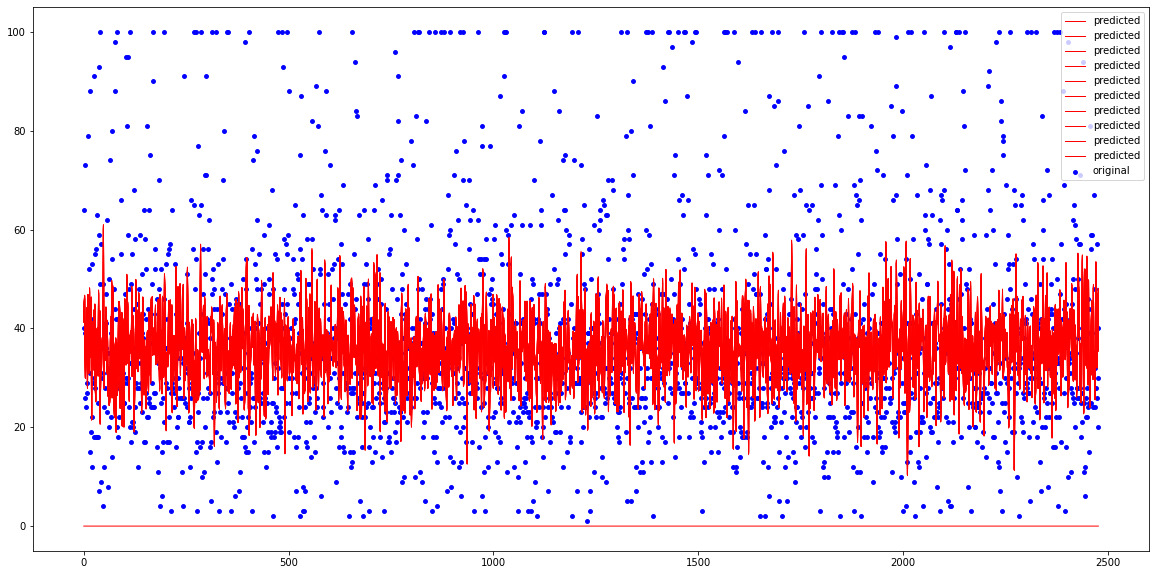

In [ ]:
model_eval(ann_flipped_horizontal, X_train, y_train, X_test, y_test, 'gray scaled, blurred & flipped horizontally')

In [ ]:
X_flipped_vertical = (np.array(flipped_vertical))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_flipped_vertical, y, random_state=42)

In [ ]:
ann_flipped_vertical= tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='relu')
      ])

ann_flipped_vertical.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

ann_flipped_vertical.fit(X_train, y_train, epochs=5)

Epoch 1/5
233/233 [==============================] - 39s 163ms/step - loss: 655.5381 - root_mean_squared_error: 25.6035
Epoch 2/5
233/233 [==============================] - 25s 106ms/step - loss: 622.6384 - root_mean_squared_error: 24.9527
Epoch 3/5
233/233 [==============================] - 23s 99ms/step - loss: 616.1419 - root_mean_squared_error: 24.8222
Epoch 4/5
233/233 [==============================] - 25s 109ms/step - loss: 526.5223 - root_mean_squared_error: 22.9461
Epoch 5/5
233/233 [==============================] - 23s 97ms/step - loss: 465.8838 - root_mean_squared_error: 21.5843


78/78 [==============================] - 2s 30ms/step - loss: 631.3411 - root_mean_squared_error: 25.1265

    gray scaled, blurred & flipped vertically Training Metrics:
    Loss: 602.445
    Root Mean Square Error: 24.545
    Cross Validation Score: 
    ------
    gray scaled, blurred & flipped vertically Test Metrics:
    Loss: 631.341
    Root Mean Square Error: 25.127
    


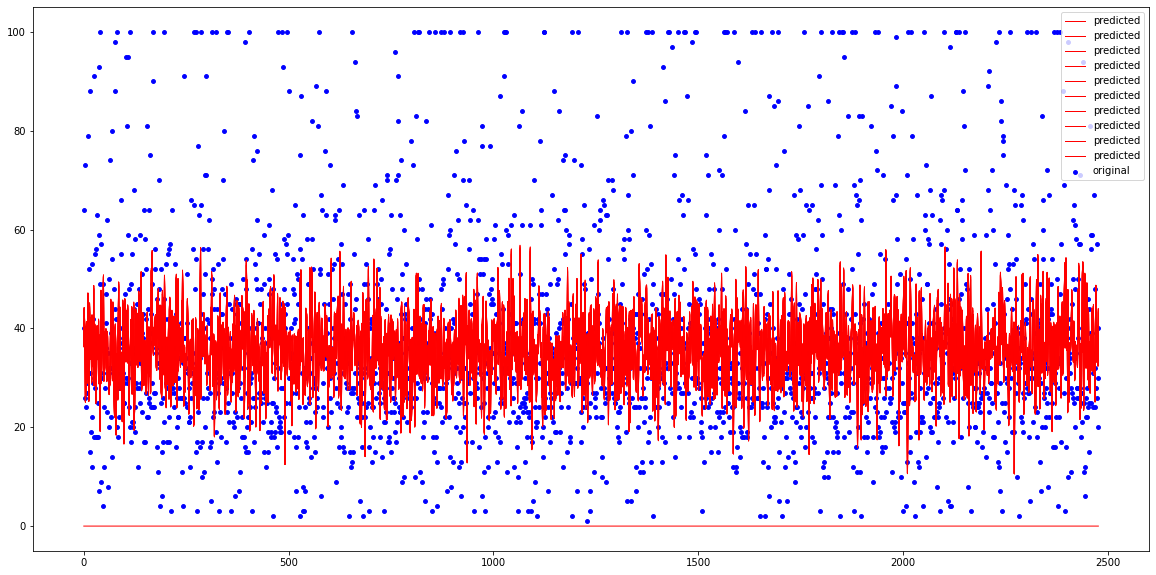

In [ ]:
model_eval(ann_flipped_horizontal, X_train, y_train, X_test, y_test, 'gray scaled, blurred & flipped vertically')